In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open('top_result_Total_population.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame from the 'state_data' field
df = pd.DataFrame(data['state_data'])

# Display the first few rows
df.head()

,state,ratio,nursing_home_ratio
0,New York,0.313082,0.002574
1,Alabama,0.276214,0.004548
2,Alaska,0.169850,0.000868
3,Arizona,0.277559,0.001646
4,Arkansas,0.278152,0.005759


/var/folders/1f/gpv23w7n01x6ppgkwtxfhsx80000gn/T/ipykernel_87480/120552415.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


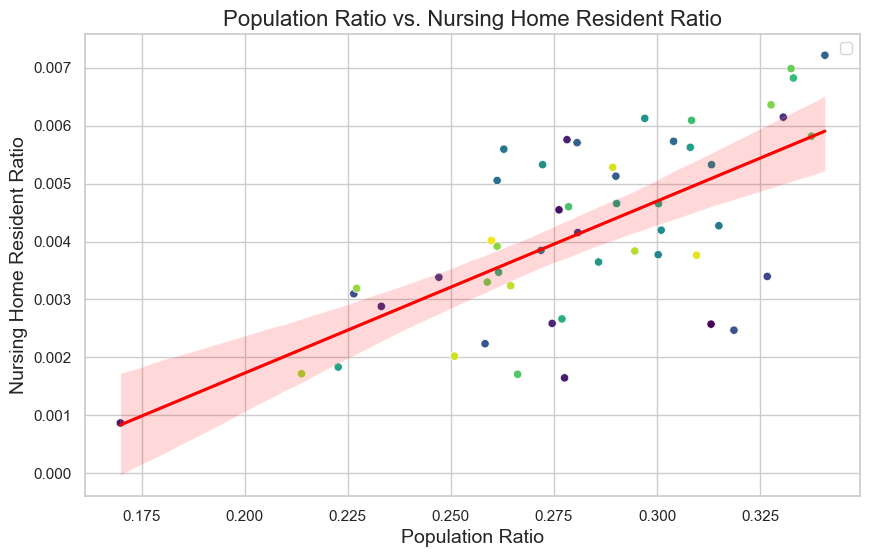

In [3]:
# Set seaborn style for better aesthetics
sns.set(style='whitegrid', context='notebook')

# Create the scatter plot with seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='ratio',
    y='nursing_home_ratio',
    hue='state',
    palette='viridis',
    legend=False
)

# Fit and plot a regression line
sns.regplot(
    data=df,
    x='ratio',
    y='nursing_home_ratio',
    scatter=False,
    color='red',
    line_kws={'label': 'Line of Best Fit'}
)

# Add labels and title
plt.title('Population Ratio vs. Nursing Home Resident Ratio', fontsize=16)
plt.xlabel('Population Ratio', fontsize=14)
plt.ylabel('Nursing Home Resident Ratio', fontsize=14)

# Add legend for the regression line
plt.legend()

# Show the plot
plt.show()

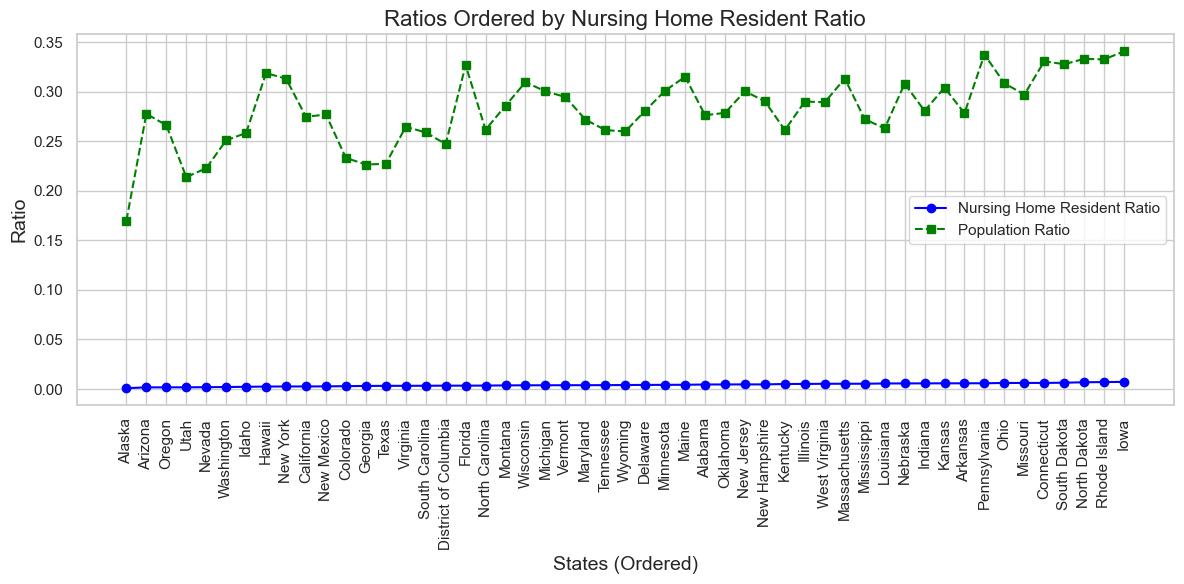

In [4]:
# Sort the DataFrame by 'nursing_home_ratio'
df_sorted = df.sort_values(by='nursing_home_ratio').reset_index(drop=True)

# Create a new figure for the line plot
plt.figure(figsize=(12, 6))

# Plot the nursing home resident ratio
plt.plot(
    df_sorted['nursing_home_ratio'],
    label='Nursing Home Resident Ratio',
    marker='o',
    linestyle='-',
    color='blue'
)

# Plot the population ratio
plt.plot(
    df_sorted['ratio'],
    label='Population Ratio',
    marker='s',
    linestyle='--',
    color='green'
)

# Add labels and title
plt.title('Ratios Ordered by Nursing Home Resident Ratio', fontsize=16)
plt.xlabel('States (Ordered)', fontsize=14)
plt.ylabel('Ratio', fontsize=14)

# Add x-ticks with state names
plt.xticks(
    ticks=range(len(df_sorted)),
    labels=df_sorted['state'],
    rotation=90
)

# Add legend
plt.legend()

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()